# Task 3 – Neural Networks 

Task 3 (Part 1): The dataset provided on blackboard contains images of MRI scans from patients diagnosed
with Alzheimer's, separated into four classes; 0: Mild Demented, 1: Moderate Demented, 2:
NonDemented, 3: Very Mild Demented.

In [2]:
# Neural Networks:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from tqdm import tqdm

# Metrics:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Loading Dataset

In [3]:

# Root File Location of the Data:
file_loc = "C:\\Users\\DELL\\OneDrive - University of South Wales\\Desktop\\Machine_Learning_Assessment\\Deep_Learning_Assessment2"


# Training Data Location:
load_train = f'{file_loc}\\train_data.pt'
load_train_labels = f'{file_loc}\\train_labels.pt'

# Testing Data Location:
load_test = f'{file_loc}\\test_data.pt'
load_test_labels = f'{file_loc}\\test_labels.pt'



# Load Training and Testing Data:
# Note: The "to" function, can also be used to change to float.

train_images = torch.load(load_train)
test_images = torch.load(load_test)
train_labels = torch.load(load_train_labels).to(torch.long)
test_labels = torch.load(load_test_labels).to(torch.long)

# Dataset Viewing and Understanding 

In [4]:
train_images.shape, test_images.shape

(torch.Size([5121, 3, 208, 176]), torch.Size([1279, 3, 208, 176]))

The Corresponding Label is: tensor(3)


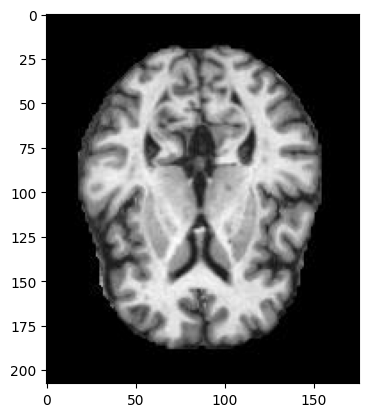

In [5]:
import matplotlib.pyplot as plt

# Define the sample number
sample_num = 500

# Print the corresponding label
print("The Corresponding Label is:", train_labels[sample_num])

# Display the image
plt.imshow(train_images[sample_num][0], cmap='gray')
plt.show()

In [6]:
train_images.shape[3]

176

In [7]:
# Reshape the train and test images tensors
train_images_NN = train_images.view(train_images.shape[0], -1)
test_images_NN = test_images.view(test_images.shape[0], -1)


In [8]:
print(train_images_NN.shape, test_images_NN.shape)
print(train_images_NN.type(), test_images_NN.type())
print(train_labels.type(), test_labels.type())

torch.Size([5121, 109824]) torch.Size([1279, 109824])
torch.FloatTensor torch.FloatTensor
torch.LongTensor torch.LongTensor


# Basic (Simple) Neural Network

In [20]:
class Simple_NN(nn.Module):
    
    def __init__(self, n_features):
        super().__init__()
        self.fc1 = nn.Linear(n_features, 200) # w1x1 + w2x2 +w3x3 + .....109824 network parameters
        self.fc2 = nn.Linear(200, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x

In [21]:
net = Simple_NN(n_features= 109824)

# Print out the architectures of the neural networks
print("Simple Neural Network Architecture:")
print(net)


Simple Neural Network Architecture:
Simple_NN(
  (fc1): Linear(in_features=109824, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=4, bias=True)
)


In [22]:
def train(model, images, labels, epochs, batch_size):
    loss_function = nn.CrossEntropyLoss()
    optimizer =  torch.optim.SGD(model.parameters(), lr=0.1)
    
    # Training Loop:
    for epoch in range(epochs):
        for i in tqdm(range(0, len(images), batch_size)):
            # Batch the Data:
            batch_data = images[i:i+batch_size]
            batch_labels =labels[i:i+batch_size]

            # 1) Calculate the Output of Model:
            y_predicted = model.forward(batch_data)

            # 2) Calculate the Error:
            loss = loss_function(y_predicted, batch_labels)

            # 3) Calculate the Gradients (Note: We'll ensure that the gradients are empty first, before we calculate it):
            model.zero_grad() # Reset Gradients
            loss.backward() # Calculate the Gradients

            # 4) Update the Gradients:
            optimizer.step()

        print(f"Iteration {epoch} | Loss: {loss}")


In [23]:
train(net, train_images_NN, train_labels, epochs=5, batch_size=100)

100%|██████████| 52/52 [00:11<00:00,  4.57it/s]


Iteration 0 | Loss: 1.0290888547897339


100%|██████████| 52/52 [00:10<00:00,  4.97it/s]


Iteration 1 | Loss: 0.9551807641983032


100%|██████████| 52/52 [00:11<00:00,  4.63it/s]


Iteration 2 | Loss: 0.9408624768257141


100%|██████████| 52/52 [00:11<00:00,  4.72it/s]


Iteration 3 | Loss: 0.9393962621688843


100%|██████████| 52/52 [00:11<00:00,  4.65it/s]

Iteration 4 | Loss: 0.9414527416229248


In [25]:
import torch
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix

def test(model, images, labels, batch_size=100):
    model.to('cpu')  # Move model to CPU for testing
    model.eval()     # Set model to evaluation mode

    with torch.no_grad():
        num_samples = len(images)
        num_batches = (num_samples + batch_size - 1) // batch_size

        predicted_classes = []
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, num_samples)
            batch_images = images[start_idx:end_idx]

            # Forward pass
            y_predicted = model(batch_images)
            predicted_classes.extend(torch.argmax(y_predicted, dim=1))

    predicted_classes = torch.stack(predicted_classes)

    # Print sample data
    print(f"Data Examples: {y_predicted[0]} \n\n{labels[0]}")

    # Calculate accuracy
    correct = torch.sum(predicted_classes == labels).item()
    total = len(labels)
    accuracy = correct / total
    print(f"Accuracy: {accuracy:.3f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(labels, predicted_classes)
    print("Confusion Matrix:")
    print(conf_matrix)


test(net, test_images_NN, test_labels)

Data Examples: tensor([-2.0433, -3.4264, -0.6976, -1.0785]) 

3
Accuracy: 0.500
Confusion Matrix:
[[  0   0 179   0]
 [  0   0  12   0]
 [  0   0 640   0]
 [  0   0 448   0]]


To improve the Simple Neural Network and Convolutional Neural Network provided, we can make some modifications to enhance their performance. Below are the improvements for each network:

Improved Simple Neural Network: Add Dropout layers to prevent overfitting. Increase the number of neurons in each hidden layer to capture more complex patterns. Use a different activation function, such as Leaky ReLU or SELU, to mitigate the vanishing gradient problem. Add Batch Normalization layers to stabilize and accelerate the training process.

Improved Convolutional Neural Network: Increase the number of convolutional filters to capture more features. Add more convolutional layers to extract hierarchical features. Use batch normalization after each convolutional layer to accelerate training. Add Dropout layers to reduce overfitting.

# Improved Of Basic (Simple) Neural Network

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

class Improved_Simple_NN(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.fc1 = nn.Linear(n_features, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 4)
        self.dropout = nn.Dropout(0.5)
        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(256)
        self.bn3 = nn.BatchNorm1d(128)

    def forward(self, x):
        x = self.bn1(F.relu(self.fc1(x)))
        x = self.dropout(x)
        x = self.bn2(F.relu(self.fc2(x)))
        x = self.dropout(x)
        x = self.bn3(F.relu(self.fc3(x)))
        x = self.fc4(x)
        return x



In [37]:
net = Improved_Simple_NN(n_features=109824)

# Print out the architectures of the neural networks
print("Improved Simple Neural Network Architecture:")
print(net)

Improved Simple Neural Network Architecture:
Improved_Simple_NN(
  (fc1): Linear(in_features=109824, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=4, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [38]:
def train(model, images, labels, epochs, batch_size):
    loss_function = nn.CrossEntropyLoss()
    optimizer =  torch.optim.Adam(model.parameters(), lr=0.001)
    
    # Training Loop:
    for epoch in range(epochs):
        for i in tqdm(range(0, len(images), batch_size)):
            # Batch the Data:
            batch_data = images[i:i+batch_size]
            batch_labels =labels[i:i+batch_size]

            # 1) Calculate the Output of Model:
            y_predicted = model.forward(batch_data)

            # 2) Calculate the Error:
            loss = loss_function(y_predicted, batch_labels)

            # 3) Calculate the Gradients (Note: We'll ensure that the gradients are empty first, before we calculate it):
            model.zero_grad() # Reset Gradients
            loss.backward() # Calculate the Gradients

            # 4) Update the Gradients:
            optimizer.step()

        print(f"Iteration {epoch} | Loss: {loss}")

In [39]:
train(net, train_images_NN, train_labels, epochs=10, batch_size=150)

100%|██████████| 35/35 [00:53<00:00,  1.54s/it]


Iteration 0 | Loss: 1.3253297805786133


100%|██████████| 35/35 [00:52<00:00,  1.49s/it]


Iteration 1 | Loss: 1.0346912145614624


100%|██████████| 35/35 [00:52<00:00,  1.49s/it]


Iteration 2 | Loss: 0.6985836625099182


100%|██████████| 35/35 [00:51<00:00,  1.48s/it]


Iteration 3 | Loss: 0.5441970825195312


100%|██████████| 35/35 [00:54<00:00,  1.57s/it]


Iteration 4 | Loss: 0.398394912481308


100%|██████████| 35/35 [00:55<00:00,  1.57s/it]


Iteration 5 | Loss: 0.3327995240688324


100%|██████████| 35/35 [00:54<00:00,  1.57s/it]


Iteration 6 | Loss: 0.32768571376800537


100%|██████████| 35/35 [00:52<00:00,  1.49s/it]


Iteration 7 | Loss: 0.33579614758491516


100%|██████████| 35/35 [00:52<00:00,  1.51s/it]


Iteration 8 | Loss: 0.16644150018692017


100%|██████████| 35/35 [00:50<00:00,  1.45s/it]

Iteration 9 | Loss: 0.24786818027496338


In [40]:
def test(model, images, labels):
    model.to('cpu') # Model on CPU for testing.

    with torch.no_grad():
        y_predicted = model.forward(images)

    print(f"Data Examples: {y_predicted[0]} \n\n{labels[0]}")

    predicted_classes = torch.argmax(y_predicted, dim = 1)
    print(predicted_classes[0:5])
    print(labels[0:5])


    # Accuracy:
    correct = 0
    total = 0

    for i in range(len(predicted_classes)):
        if predicted_classes[i] == labels[i]:
            correct += 1
        total += 1

    print(f"Accuracy: {round(correct/total, 3)}")
    
    # Confusion Matrix:


    conf_matrix = confusion_matrix(labels, predicted_classes)
    print(conf_matrix)


In [41]:
test(net, test_images, test_labels)

Data Examples: tensor([-2.1697, -3.1387,  3.4389,  0.8598]) 

3
tensor([2, 2, 3, 0, 2])
tensor([3, 2, 2, 0, 0])
Accuracy: 0.557
[[ 62   0  47  70]
 [  3   0   4   5]
 [ 57   2 427 154]
 [ 65   1 158 224]]


# Convolutional Neural Network

In [3]:
class Conv_NN(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        
        # Convolutional Layers & Max Pooling Layer Defined:
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 8, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        # Flatten Data: Cannot yet be defined
        
        
        # Linear Layers: Cannot yet be defined
        

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        print(f"Step 1: Shape of Data before Flattening: {x.shape}")


        




        return x


In [4]:
net  = Conv_NN(n_channels = 3)

In [17]:
n_samples = 10
train_output = net.forward(train_images[0:n_samples])
test_output = net.forward(test_images[0:n_samples])

In [18]:
#Flatten Function:

n_dimensions = 1 # What Happens when I change this number?
myfunc = nn.Flatten(n_dimensions)

train_output2 = myfunc(train_output)
test_output2 = myfunc(test_output)
print(f"The Shape of train_images after using the Flatten Function is: {train_output2.shape}")
print(f"The Shape of test_images after using the Flatten Function is: {test_output2.shape}")

The Shape of train_images after using the Flatten Function is: torch.Size([10, 4])
The Shape of test_images after using the Flatten Function is: torch.Size([10, 4])


In [19]:
class Conv_NN(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        
        # Convolutional Layers & Max Pooling Layer Defined:
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 8, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        # Flatten Data:
        self.flatten = nn.Flatten(1)
        
        # Linear Layers:
        self.fc1 = nn.Linear(16*49*41, 128)
        self.fc2 = nn.Linear(128, 4)
        
    def forward(self, x):
        # Step 1: Convolutional Layers
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # print(f"Step 1: Shape of Data before Flattening: {x.shape}")


        # Step 2: Flatten Data & Linear Layers
        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)

        return x

In [20]:
net  = Conv_NN(n_channels = 3)

# Train Looping Basic Convolutional Neural Network

In [21]:
def train(model, images, labels, epochs, batch_size):
    loss_function = nn.CrossEntropyLoss()
    optimizer =  torch.optim.SGD(model.parameters(), lr=0.1)
    
    # Training Loop:
    for epoch in range(epochs):
        for i in tqdm(range(0, len(images), batch_size)):
            # Batch the Data:
            batch_data = images[i:i+batch_size]
            batch_labels =labels[i:i+batch_size]

            # 1) Calculate the Output of Model:
            y_predicted = model.forward(batch_data)

            # 2) Calculate the Error:
            loss = loss_function(y_predicted, batch_labels)

            # 3) Calculate the Gradients (Note: We'll ensure that the gradients are empty first, before we calculate it):
            model.zero_grad() # Reset Gradients
            loss.backward() # Calculate the Gradients

            # 4) Update the Gradients:
            optimizer.step()

        print(f"Iteration {epoch} | Loss: {loss}")

In [23]:
train(net, train_images, train_labels, epochs=5, batch_size=100)

100%|██████████| 52/52 [02:13<00:00,  2.57s/it]


Iteration 0 | Loss: 0.9448645710945129


100%|██████████| 52/52 [02:01<00:00,  2.34s/it]


Iteration 1 | Loss: 0.9548842310905457


100%|██████████| 52/52 [02:02<00:00,  2.35s/it]


Iteration 2 | Loss: 0.952023983001709


100%|██████████| 52/52 [02:07<00:00,  2.44s/it]


Iteration 3 | Loss: 0.9609330296516418


100%|██████████| 52/52 [02:07<00:00,  2.45s/it]

Iteration 4 | Loss: 0.9211434125900269


# Test Looping Basic Convolutional Neural Network

In [32]:
import torch
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix

def test(model, images, labels, batch_size=100):
    model.to('cpu')  # Move model to CPU for testing
    model.eval()     # Set model to evaluation mode

    with torch.no_grad():
        num_samples = len(images)
        num_batches = (num_samples + batch_size - 1) // batch_size

        predicted_classes = []
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, num_samples)
            batch_images = images[start_idx:end_idx]

            # Forward pass
            y_predicted = model(batch_images)
            predicted_classes.extend(torch.argmax(y_predicted, dim=1))

    predicted_classes = torch.stack(predicted_classes)

    # Print sample data
    print(f"Data Examples: {y_predicted[0]} \n\n{labels[0]}")

    # Calculate accuracy
    correct = torch.sum(predicted_classes == labels).item()
    total = len(labels)
    accuracy = correct / total
    print(f"Accuracy: {accuracy:.3f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(labels, predicted_classes)
    print("Confusion Matrix:")
    print(conf_matrix)


test(net, test_images, test_labels)

Data Examples: tensor([-2.8390, -4.6994, -0.3364, -1.5228]) 

3
Accuracy: 0.500
Confusion Matrix:
[[  0   0 179   0]
 [  0   0  12   0]
 [  0   0 640   0]
 [  0   0 448   0]]


# Performing Improved Convolutional Neural Network

In [33]:
class Improved_Conv_NN(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        
        # Convolutional Layers & Max Pooling Layer Defined:
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 8, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        # Flatten Data:
        self.flatten = nn.Flatten(1)
        
        # Linear Layers:
        self.fc1 = nn.Linear(16*49*41, 512)
        self.fc2 = nn.Linear(512, 4)
        
    def forward(self, x):
        # Step 1: Convolutional Layers
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # print(f"Step 1: Shape of Data before Flattening: {x.shape}")


        # Step 2: Flatten Data & Linear Layers
        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)

        return x

In [34]:
net  = Conv_NN(n_channels = 3)

# Train Looping For Improved CNN

In [35]:
def train(model, images, labels, epochs, batch_size):
    loss_function = nn.CrossEntropyLoss()
    optimizer =  torch.optim.Adam(model.parameters(), lr=0.0001)
    
    # Training Loop:
    for epoch in range(epochs):
        for i in tqdm(range(0, len(images), batch_size)):
            # Batch the Data:
            batch_data = images[i:i+batch_size]
            batch_labels =labels[i:i+batch_size]

            # 1) Calculate the Output of Model:
            y_predicted = model.forward(batch_data)

            # 2) Calculate the Error:
            loss = loss_function(y_predicted, batch_labels)

            # 3) Calculate the Gradients (Note: We'll ensure that the gradients are empty first, before we calculate it):
            model.zero_grad() # Reset Gradients
            loss.backward() # Calculate the Gradients

            # 4) Update the Gradients:
            optimizer.step()

        print(f"Iteration {epoch} | Loss: {loss}")

In [36]:
train(net, train_images, train_labels, epochs=10, batch_size=150)

100%|██████████| 35/35 [02:01<00:00,  3.46s/it]


Iteration 0 | Loss: 1.0395499467849731


100%|██████████| 35/35 [01:59<00:00,  3.43s/it]


Iteration 1 | Loss: 1.007035255432129


100%|██████████| 35/35 [02:07<00:00,  3.65s/it]


Iteration 2 | Loss: 0.9149960279464722


100%|██████████| 35/35 [02:07<00:00,  3.65s/it]


Iteration 3 | Loss: 0.8776208162307739


100%|██████████| 35/35 [02:06<00:00,  3.60s/it]


Iteration 4 | Loss: 0.8627392649650574


100%|██████████| 35/35 [02:05<00:00,  3.58s/it]


Iteration 5 | Loss: 0.830743134021759


100%|██████████| 35/35 [02:19<00:00,  4.00s/it]


Iteration 6 | Loss: 0.7945809364318848


100%|██████████| 35/35 [02:17<00:00,  3.92s/it]


Iteration 7 | Loss: 0.7486974596977234


100%|██████████| 35/35 [02:11<00:00,  3.76s/it]


Iteration 8 | Loss: 0.699303388595581


100%|██████████| 35/35 [02:14<00:00,  3.83s/it]

Iteration 9 | Loss: 0.645340621471405


# Test Looping For Improved CNN

In [37]:
def test(model, images, labels, batch_size=150):
    model.to('cpu')  # Move model to CPU for testing
    model.eval()     # Set model to evaluation mode

    with torch.no_grad():
        num_samples = len(images)
        num_batches = (num_samples + batch_size - 1) // batch_size

        predicted_classes = []
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, num_samples)
            batch_images = images[start_idx:end_idx]

            # Forward pass
            y_predicted = model(batch_images)
            predicted_classes.extend(torch.argmax(y_predicted, dim=1))

    predicted_classes = torch.stack(predicted_classes)

    # Print sample data
    print(f"Data Examples: {y_predicted[0]} \n\n{labels[0]}")

    # Calculate accuracy
    correct = torch.sum(predicted_classes == labels).item()
    total = len(labels)
    accuracy = correct / total
    print(f"Accuracy: {accuracy:.3f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(labels, predicted_classes)
    print("Confusion Matrix:")
    print(conf_matrix)

test(net, test_images, test_labels)

Data Examples: tensor([-4.6265, -6.5236, -0.1513, -2.0470]) 

3
Accuracy: 0.556
Confusion Matrix:
[[  0   0 136  43]
 [  0   0  10   2]
 [  0   0 625  15]
 [  0   0 362  86]]


Basic Simple Neural Network:

Changes Made:
Increased Batch Size: By increasing the batch size, the model can process more samples in each iteration, leading to more stable updates of the weights and biases during training.

Increased Epochs: Training the model for more epochs allows it to see the training data multiple times, which can help in capturing complex patterns in the data.

Reduced Learning Rate: Lowering the learning rate can help prevent the model from overshooting the optimal solution and aids in convergence.

Improvements Observed:

The loss decreased significantly from 0.941 to 0.247, indicating that the model is better at minimizing errors during training.
The testing accuracy improved from 0.5 to 0.557, suggesting that the model performs better on unseen data.

Convolutional Neural Network (CNN):

Changes Made:

Increased Batch Size: Similar to the simple neural network, increasing the batch size allows for more stable updates during training.

Increased Epochs: Training for more epochs helps the CNN to learn more complex features from the data.

Reduced Learning Rate: Lowering the learning rate aids in smoother convergence of the CNN model.

Improvements Observed:

The loss decreased from 0.921 to 0.645, indicating better error minimization during training.
The testing accuracy improved slightly from 0.5 to 0.556, suggesting better generalization performance on unseen data.

Comparative Analysis:

Both the basic and CNN models benefited from the increased batch size, epochs, and reduced learning rate.

The improvements in loss and testing accuracy were more pronounced in the basic simple neural network compared to the CNN.
While the CNN showed improvements, they were relatively smaller compared to the basic model. This could be due to the complexity of the CNN architecture, which might require more sophisticated techniques or additional layers to further enhance performance.

By adjusting hyperparameters such as batch size, epochs, and learning rate, both models were able to achieve better results. However, the basic simple neural network demonstrated more significant improvements in terms of loss and testing accuracy compared to the convolutional neural network. Further optimizations specific to CNNs may be necessary to unlock their full potential.

# Task 3 (Part 2)

To perform the task of testing different learning rates (LR) with the optimized Convolutional Neural Network (CNN), we can adjust the LR parameter in the SGD optimizer while keeping all other parameters in the model the same. Let's first define the two scenarios as instructed:

Learning rate of 0.00000001 Learning rate of 10 We'll then train the CNN model using each LR setting and evaluate their performance.

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

class Improved_Conv_NN(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        
        # Convolutional Layers & Max Pooling Layer Defined:
        self.conv1 = nn.Conv2d(in_channels=n_channels, out_channels=8, kernel_size=(5,5))
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        # Flatten Data:
        self.flatten = nn.Flatten(1)
        
        # Linear Layers:
        self.fc1 = nn.Linear(16*49*41, 512)
        self.fc2 = nn.Linear(512, 4)
        
    def forward(self, x):
        # Step 1: Convolutional Layers
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # print(f"Step 1: Shape of Data before Flattening: {x.shape}")

        # Step 2: Flatten Data & Linear Layers
        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)

        return x

def train(model, images, labels, epochs, batch_size):
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.00000001)
    
    # Training Loop:
    for epoch in range(epochs):
        for i in tqdm(range(0, len(images), batch_size)):
            # Batch the Data:
            batch_data = images[i:i+batch_size]
            batch_labels = labels[i:i+batch_size]

            # 1) Calculate the Output of Model:
            y_predicted = model.forward(batch_data)

            # 2) Calculate the Error:
            loss = loss_function(y_predicted, batch_labels)

            # 3) Calculate the Gradients (Note: We'll ensure that the gradients are empty first, before we calculate it):
            model.zero_grad() # Reset Gradients
            loss.backward() # Calculate the Gradients

            # 4) Update the Gradients:
            optimizer.step()

        print(f"Iteration {epoch} | Loss: {loss}")

net = Improved_Conv_NN(n_channels=3)
train(net, train_images, train_labels, epochs=10, batch_size=150)

100%|██████████| 35/35 [02:27<00:00,  4.21s/it]


Iteration 0 | Loss: 1.3568617105484009


100%|██████████| 35/35 [02:38<00:00,  4.54s/it]


Iteration 1 | Loss: 1.356860876083374


100%|██████████| 35/35 [02:26<00:00,  4.19s/it]


Iteration 2 | Loss: 1.356859803199768


100%|██████████| 35/35 [02:16<00:00,  3.90s/it]


Iteration 3 | Loss: 1.3568589687347412


100%|██████████| 35/35 [02:17<00:00,  3.94s/it]


Iteration 4 | Loss: 1.3568578958511353


100%|██████████| 35/35 [02:14<00:00,  3.84s/it]


Iteration 5 | Loss: 1.3568569421768188


100%|██████████| 35/35 [02:15<00:00,  3.88s/it]


Iteration 6 | Loss: 1.3568559885025024


100%|██████████| 35/35 [02:18<00:00,  3.97s/it]


Iteration 7 | Loss: 1.3568551540374756


100%|██████████| 35/35 [02:22<00:00,  4.08s/it]


Iteration 8 | Loss: 1.3568540811538696


100%|██████████| 35/35 [02:15<00:00,  3.86s/it]

Iteration 9 | Loss: 1.3568531274795532


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

class Improved_Conv_NN(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        
        # Convolutional Layers & Max Pooling Layer Defined:
        self.conv1 = nn.Conv2d(in_channels=n_channels, out_channels=8, kernel_size=(5,5))
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        # Flatten Data:
        self.flatten = nn.Flatten(1)
        
        # Linear Layers:
        self.fc1 = nn.Linear(16*49*41, 512)
        self.fc2 = nn.Linear(512, 4)
        
    def forward(self, x):
        # Step 1: Convolutional Layers
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # print(f"Step 1: Shape of Data before Flattening: {x.shape}")

        # Step 2: Flatten Data & Linear Layers
        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)

        return x

def train(model, images, labels, epochs, batch_size):
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=10)
    
    # Training Loop:
    for epoch in range(epochs):
        for i in tqdm(range(0, len(images), batch_size)):
            # Batch the Data:
            batch_data = images[i:i+batch_size]
            batch_labels = labels[i:i+batch_size]

            # 1) Calculate the Output of Model:
            y_predicted = model.forward(batch_data)

            # 2) Calculate the Error:
            loss = loss_function(y_predicted, batch_labels)

            # 3) Calculate the Gradients (Note: We'll ensure that the gradients are empty first, before we calculate it):
            model.zero_grad() # Reset Gradients
            loss.backward() # Calculate the Gradients

            # 4) Update the Gradients:
            optimizer.step()

        print(f"Iteration {epoch} | Loss: {loss}")

net = Improved_Conv_NN(n_channels=3)
train(net, train_images, train_labels, epochs=10, batch_size=150)


100%|██████████| 35/35 [02:16<00:00,  3.90s/it]


Iteration 0 | Loss: 1.9325971603393555


100%|██████████| 35/35 [02:14<00:00,  3.85s/it]


Iteration 1 | Loss: 1.729508876800537


100%|██████████| 35/35 [02:15<00:00,  3.88s/it]


Iteration 2 | Loss: 2.0973129272460938


100%|██████████| 35/35 [02:12<00:00,  3.78s/it]


Iteration 3 | Loss: 1.6758016347885132


100%|██████████| 35/35 [02:19<00:00,  4.00s/it]


Iteration 4 | Loss: 2.0903477668762207


100%|██████████| 35/35 [02:28<00:00,  4.25s/it]


Iteration 5 | Loss: 1.9143460988998413


100%|██████████| 35/35 [02:19<00:00,  4.00s/it]


Iteration 6 | Loss: 1.267431616783142


100%|██████████| 35/35 [02:17<00:00,  3.92s/it]


Iteration 7 | Loss: 1.8611071109771729


100%|██████████| 35/35 [02:25<00:00,  4.17s/it]


Iteration 8 | Loss: 2.648035764694214


100%|██████████| 35/35 [02:12<00:00,  3.79s/it]

Iteration 9 | Loss: 2.078148365020752


Testing Different Learning Rates:

Learning Rate = 0.00000001:

Impact: With such a low learning rate, the model updates its parameters very slowly during training. This results in slow convergence, and the model might take a long time to reach an acceptable level of performance. There's a risk of getting stuck in local minima, and the training might require many epochs to converge.
Advantages: A very low learning rate can be beneficial when dealing with very noisy or complex datasets. It helps in fine-tuning the model parameters gradually, reducing the risk of overshooting the optimal solution.
Disadvantages: The main disadvantage is the slow convergence rate. It might require a large number of training epochs, which can be computationally expensive. Additionally, there's a higher chance of getting stuck in local minima due to the slow parameter updates.


Learning Rate = 10:

Impact: A learning rate of 10 is extremely high and can lead to very large updates in parameter values during training. This can result in the model overshooting the optimal solution, causing instability and divergence in the training process. The loss might oscillate wildly, and the model might fail to converge.

Advantages: A high learning rate can help in faster convergence, especially when dealing with simple or well-behaved datasets. It allows the model to quickly adjust its parameters and reach the optimal solution in fewer epochs.

Disadvantages: The main disadvantage is the risk of instability and divergence. With such a high learning rate, the model might overshoot the optimal solution and fail to converge. It might also struggle to generalize well to unseen data, leading to poor performance on validation or test datasets.

    
Discussion on Learning Rate

Advantages of Higher Learning Rate:
Faster convergence: A higher learning rate can help in faster convergence by making larger updates to the model parameters.
Suitable for simple datasets: In simple or well-behaved datasets, a higher learning rate can help in quickly reaching the optimal solution.

    
Disadvantages of Higher Learning Rate:
Risk of divergence: Too high a learning rate can lead to instability and divergence in the training process, causing the model to fail to converge.
Overshooting: The model might overshoot the optimal solution and struggle to generalize well to unseen data.

    
Advantages of Lower Learning Rate:
Stability: A lower learning rate ensures stability during training, reducing the risk of divergence and overshooting.
Better generalization: It allows the model to fine-tune its parameters gradually, leading to better generalization to unseen data.

    
Disadvantages of Lower Learning Rate:
Slow convergence: Training with a lower learning rate might require more epochs to converge, making it computationally expensive.
Risk of local minima: The model might get stuck in local minima due to slow parameter updates, especially in noisy or complex datasets.


Choosing an appropriate learning rate is crucial for the success of the training process. It should be carefully tuned based on the dataset characteristics and model complexity to ensure stable convergence and optimal performance.

# Part 2b

Batch size is a crucial hyperparameter in training deep learning models, and its selection can significantly impact the training process and the performance of the model. Here, I'll discuss the advantages and disadvantages of both higher and lower batch sizes:

Advantages of Higher Batch Size:

Faster Training: With a higher batch size, more samples are processed simultaneously, leading to faster training times. This is because parallel computations are more efficient on modern GPUs when dealing with larger batches.
Better Hardware Utilization: High batch sizes make better use of parallel processing capabilities of modern hardware, such as GPUs, which are optimized for processing large batches of data.
Smooth Gradient Estimation: Since the gradient is computed based on more samples, it tends to be more representative of the overall dataset, resulting in smoother convergence towards the optimal solution.
Stable Training: Larger batches provide more stable updates to model parameters, reducing the variance in parameter updates and leading to more stable training dynamics.
Improved Generalization: Higher batch sizes can help in achieving better generalization by averaging out noise and outliers in the gradient estimates.


Disadvantages of Higher Batch Size:

Memory Requirements: Larger batch sizes require more memory, limiting the size of the models that can be trained on available hardware. This can be a significant constraint, especially for models with large architectures or when training on resource-constrained devices.
Slower Convergence: In some cases, higher batch sizes may lead to slower convergence or suboptimal solutions due to less frequent updates of model parameters.
Difficulty in Generalization: While larger batch sizes can improve generalization in some cases, they may also result in overfitting if not carefully tuned. The smoothing effect of large batches can lead to underfitting on complex datasets.


Advantages of Lower Batch Size:

Lower Memory Requirements: Lower batch sizes require less memory, enabling training of larger models or more complex architectures on limited hardware resources.
Faster Convergence: Smaller batches allow for more frequent updates of model parameters, which can accelerate the convergence of the training process.
Improved Generalization: Lower batch sizes can help prevent overfitting by introducing more stochasticity into the optimization process, leading to better generalization on unseen data.
Exploration of Diverse Minima: Training with smaller batches allows the model to explore a larger variety of local minima, potentially leading to better solutions.


Disadvantages of Lower Batch Size:

Slower Training: Training with smaller batches can be slower compared to larger batches, as fewer samples are processed simultaneously, leading to less efficient utilization of hardware resources.
Noisy Gradient Estimates: The gradient estimates computed from smaller batches may be noisier and less representative of the true gradient, leading to more erratic training dynamics and slower convergence.
Difficulty in GPU Utilization: Some GPU architectures may not be efficiently utilized with very small batch sizes, leading to suboptimal performance.

References:

https://www.youtube.com/watch?v=hCP1vGoCdYU : Computational Graph

https://www.youtube.com/watch?v=FbxTVRfQFuI : Introduction to Deep Learning

Goodfellow, Ian, et al. "Deep Learning." MIT Press, 2016.

Ruder, Sebastian. "An overview of gradient descent optimization algorithms." arXiv preprint arXiv:1609.04747 (2016).

Zhang, Chiyuan, et al. "Understanding deep learning requires rethinking generalization." arXiv preprint arXiv:1611.03530 (2016).